<a href="https://colab.research.google.com/github/andylinx/deep-learning/blob/main/my_exercises/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import random

我们尝试随机生成一组线性数据，有一定的噪声，然后使用线性回归去拟合

In [8]:
true_w = torch.tensor([2,-6.7])
true_b = 1.08

num_examples = 1000
X = torch.normal(0, 1, (num_examples, 2))
Y = torch.matmul(X, true_w) + true_b

Y += torch.normal(0, 0.003, Y.shape)

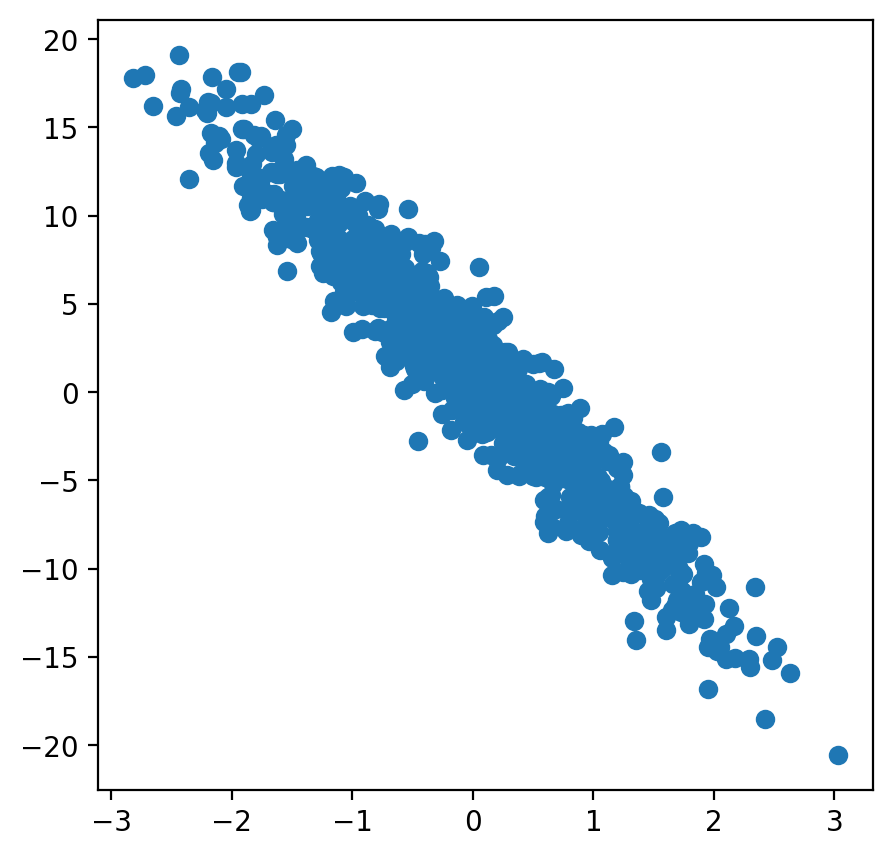

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5), dpi = 200)
plt.scatter(X[:, 1], Y)
plt.show()

In [10]:
def data_iter(batch_size, features, labels):
  num = len(features)
  indices = list(range(num))
  random.shuffle(indices)
  for i in range(0, num, batch_size):
    res = torch.tensor(indices[i : min(i + batch_size, num)])
    yield features[res], labels[res]

#initialize w b
# w = torch.normal(0, 0.1, (2, 1), requires_grad = True)
# b = torch.zeros(1, requires_grad = True)

#test w = 0,b = 0
w = torch.zeros(2, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

def calc(x, w, b):
  return torch.matmul(x, w) + b

def loss_function(y_hat, y):
  return (y_hat - y) ** 2 / 2
  #return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def gradient_descent(params, learning_rate, batch_size):
  with torch.no_grad():
    for para in params:
      para -= learning_rate * para.grad / batch_size
      para.grad.zero_()

#hyper parameters
small_batch_size = 20
learning_rate = 0.05
num_epochs = 5

for epoch in range(num_epochs):
  for x, y in data_iter(small_batch_size, X, Y):
    loss = loss_function(calc(x, w, b), y)
    loss.sum().backward()
    gradient_descent([w, b], learning_rate, small_batch_size)
  with torch.no_grad():
    final_loss = loss_function(calc(X, w, b), Y)
    print(f'epoch {epoch + 1}, loss = {float(final_loss.mean()):f}')

epoch 1, loss = 0.154713
epoch 2, loss = 0.001010
epoch 3, loss = 0.000012
epoch 4, loss = 0.000005
epoch 5, loss = 0.000005


# Questions and Answers:

1.   如果我们将权重初始化为零，会发生什么。算法仍然有效吗？
###Answer:
  经过测试仍然可以正常运算
###Offical:
如果将权重初始化为零，那么每个神经元的输出都是相同的，这意味着每个神经元学习到的参数也是相同的。因此，每个神经元都会更新相同的参数，最终导致所有神经元学习到相同的特征。因此，权重初始化为零会使算法失效。这样就失去了神经网络的优势，即可以学习到不同特征的能力。逻辑回归和神经网络有不同的权重初始化方法。对于逻辑回归，可以将权重初始化为零，因为这是一个线性模型，梯度下降算法仍然可以更新它们。然而，对于神经网络来说，将权重初始化为零可能会导致对称性问题，并阻止隐藏单元学习不同的特征。因此，最好使用随机或其他方法来初始化神经网络的权重。

2.   计算二阶导数时可能会遇到什么问题？这些问题可以如何解决？
### Official:
数值不稳定：使用中心差分技巧 $f'(x) = \frac{f(x+h)-f(x-h)}{2h}$，其中 $h = 10^{-6}$ 左右

3.   为什么在squared_loss函数中需要使用reshape函数？
###Answer:
感觉没啥用？如果我们已知两个大小相同的话
啊哈，下面的torch的自动的就需要了！reshape一下才行！
### Official:
这里使用reshape函数是为了保证y和y_hat形状相同，避免触发广播机制导致错误的结果。

In [18]:
from torch.utils import data
from torch import nn

Y = Y.reshape(1000,1)

#hyper parameters
batch_size = 20
num_epochs = 20

def load_data(data_arrays, batch_size, is_train = True): # is_train表示是否希望数据迭代器对象在每个迭代周期内打乱数据
  data_small = data.TensorDataset(*data_arrays)
  return data.DataLoader(data_small, batch_size, shuffle = is_train)

data_iter = load_data((X, Y), batch_size)

net = nn.Sequential(nn.Linear(2, 1)) # 两个参数表示输入和输出大小

net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

loss = nn.MSELoss() # L2

trainer = torch.optim.SGD(net.parameters(), lr = 0.008)

for epoch in range(num_epochs):
  for x, y in data_iter:
    l = loss(net(x), y)
    trainer.zero_grad()
    l.backward()
    trainer.step()
  l = loss(net(X), Y)
  print(f'epoch {epoch+1}, loss = {l:f}')

epoch 1, loss = 10.019114
epoch 2, loss = 2.043826
epoch 3, loss = 0.418444
epoch 4, loss = 0.085914
epoch 5, loss = 0.017700
epoch 6, loss = 0.003670
epoch 7, loss = 0.000769
epoch 8, loss = 0.000168
epoch 9, loss = 0.000043
epoch 10, loss = 0.000017
epoch 11, loss = 0.000011
epoch 12, loss = 0.000010
epoch 13, loss = 0.000010
epoch 14, loss = 0.000010
epoch 15, loss = 0.000010
epoch 16, loss = 0.000010
epoch 17, loss = 0.000010
epoch 18, loss = 0.000010
epoch 19, loss = 0.000010
epoch 20, loss = 0.000010
